## Plan

1. A Base global Model--> Captures housing price trends

2. Local City-specific models--> capture regional differences in housing dynamics

### Benefits and Why it Matters

* Segmented modeling: Housing prices behave differently across cities (coast vs inland, big vs small)

* Personalized insights: Explain why one model works better a city vs another city

* Benchmarking: can compare global vs. local performance (R2-score in each city)



## "California Housing Analysis: County-wise Insights for Kaggle"
https://www.kaggle.com/datasets/abdallahsamman/california-housing-with-name-of-counties

Download the file(zip) from my Coputer Device

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving California_Housing_CitiesAdded.csv.zip to California_Housing_CitiesAdded.csv.zip


# Unzip it

In [ ]:
import zipfile
with zipfile.ZipFile("California_Housing_CitiesAdded.csv.zip", 'r') as zip_ref:
  zip_ref.extractall("housing_data")

Confirm the file extracted correctly

In [ ]:
import os
os.listdir("housing_data")

['California_Housing_CitiesAdded.csv']

Load data

In [ ]:
import pandas as pd
df = pd.read_csv("/content/California_Housing_CitiesAdded.csv.zip")

In [ ]:
df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,ocean_proximity,City
0,500001.0,1.2434,52,249,78,396,85,37.80,-122.27,2524.614616,552234.0515,731023.5749,61415.35211,14466.70538,NEAR BAY,Alameda
1,500001.0,1.1696,52,609,236,1349,250,37.87,-122.25,7897.024567,556856.9280,735788.3723,67242.51828,19172.81885,NEAR BAY,Alameda
2,500001.0,7.8521,52,1668,225,517,214,37.86,-122.24,9154.528309,555442.5086,734372.6023,65849.13943,19335.74118,NEAR BAY,Alameda
3,500001.0,9.3959,52,3726,474,1366,496,37.85,-122.24,8259.085109,554610.7171,733525.6829,64867.28983,18811.48745,NEAR BAY,Alameda
4,500001.0,7.8772,52,2990,379,947,361,37.83,-122.23,7284.913015,552365.4712,731263.5682,62493.11252,18750.94628,NEAR BAY,Alameda


In [ ]:
!file California_Housing_CitiesAdded.csv.zip

California_Housing_CitiesAdded.csv.zip: Zip archive data, at least v4.5 to extract, compression method=deflate


Inspect the Structure

In [ ]:
print("Shape", df.shape)
print("\nInfo")
print(df.info())
print("\nMissing Values", df.isnull().sum())

Shape (20640, 16)

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-n

In [ ]:
print(df.describe())

       Median_House_Value  Median_Income    Median_Age     Tot_Rooms  \
count        20640.000000   20640.000000  20640.000000  20640.000000   
mean        206855.816909       3.870671     28.639486   2635.763081   
std         115395.615874       1.899822     12.585558   2181.615252   
min          14999.000000       0.499900      1.000000      2.000000   
25%         119600.000000       2.563400     18.000000   1447.750000   
50%         179700.000000       3.534800     29.000000   2127.000000   
75%         264725.000000       4.743250     37.000000   3148.000000   
max         500001.000000      15.000100     52.000000  39320.000000   

       Tot_Bedrooms    Population    Households      Latitude     Longitude  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean     537.898014   1425.476744    499.539680     35.631861   -119.569704   
std      421.247906   1132.462122    382.329753      2.135952      2.003532   
min        1.000000      3.000000  

* 16 Total Features
* No Missing Values
* Target --> 'Median_House_Value'
* Powerful spatial features and 2 categorical variables(ocean_proximity	City)

"City" Column

In [ ]:
print("Number of unique cities", df['City'].unique())
unique_cities = df['City'].unique()
print("Number of unique cities:", len(unique_cities))
print("\nTop 10 most frequent cities:")
print(df["City"].value_counts().head(10))

Number of unique cities ['Alameda' 'Contra Costa' 'El Dorado' 'Los Angeles' 'Orange' 'Marin'
 'Monterey' 'Riverside' 'San Bernardino' 'San Diego' 'San Francisco'
 'San Luis Obispo' 'San Mateo' 'Santa Barbara' 'Santa Clara' 'Santa Cruz'
 'Ventura' 'San Joaquin' 'Stanislaus' 'Sacramento' 'Napa' 'Placer'
 'Solano' 'Sonoma' 'San Benito' 'Nevada' 'Fresno' 'Yolo' 'Mendocino'
 'Kern' 'Mono' 'Tulare' 'Kings' 'Sutter' 'Tuolumne' 'Merced' 'Lake'
 'Butte' 'Lassen' 'Amador' 'Inyo' 'Shasta' 'Humboldt' 'Yuba' 'Imperial'
 'Madera' 'Del Norte' 'Tehama' 'Calaveras' 'Plumas' 'Siskiyou' 'Glenn'
 'Colusa' 'Sierra' 'Modoc']
Number of unique cities: 55

Top 10 most frequent cities:
City
Los Angeles       5836
Orange            1620
San Diego         1590
Alameda           1018
Santa Clara       1011
San Bernardino     827
Sacramento         702
Riverside          620
Contra Costa       593
San Francisco      574
Name: count, dtype: int64


Prepare the Dataset

In [ ]:
# Feature Engineering

# Reaload the Dataframe from csv to skip it already have this in memory!!
df = pd.read_csv("/content/California_Housing_CitiesAdded.csv.zip")

df['RoomsPerHousehold'] = df['Tot_Rooms'] / df['Households']
df['BedroomsPerRoom'] = df['Tot_Bedrooms'] / df['Tot_Rooms']
df['PopulationPerHousehold'] = df['Population'] / df['Households']

# No Need raw totals anymore
# Drop 'City' for the Base-Model (we will use it leter on city_specific models)

df.drop(columns = ['Tot_Rooms', 'Tot_Bedrooms', 'City'], inplace = True)

# Encode ecean_proximity
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

In [ ]:
df.head()

,Median_House_Value,Median_Income,Median_Age,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,RoomsPerHousehold,BedroomsPerRoom,PopulationPerHousehold,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,500001.0,1.2434,52,396,85,37.80,-122.27,2524.614616,552234.0515,731023.5749,61415.35211,14466.70538,2.929412,0.313253,4.658824,False,False,True,False
1,500001.0,1.1696,52,1349,250,37.87,-122.25,7897.024567,556856.9280,735788.3723,67242.51828,19172.81885,2.436000,0.387521,5.396000,False,False,True,False
2,500001.0,7.8521,52,517,214,37.86,-122.24,9154.528309,555442.5086,734372.6023,65849.13943,19335.74118,7.794393,0.134892,2.415888,False,False,True,False
3,500001.0,9.3959,52,1366,496,37.85,-122.24,8259.085109,554610.7171,733525.6829,64867.28983,18811.48745,7.512097,0.127214,2.754032,False,False,True,False
4,500001.0,7.8772,52,947,361,37.83,-122.23,7284.913015,552365.4712,731263.5682,62493.11252,18750.94628,8.282548,0.126756,2.623269,False,False,True,False


In [ ]:
# Convert bool to 0 and 1
df = df.astype({col: 'int' for col in df.columns if df[col].dtype == 'bool'})
df.head()

,Median_House_Value,Median_Income,Median_Age,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,RoomsPerHousehold,BedroomsPerRoom,PopulationPerHousehold,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,500001.0,1.2434,52,396,85,37.80,-122.27,2524.614616,552234.0515,731023.5749,61415.35211,14466.70538,2.929412,0.313253,4.658824,0,0,1,0
1,500001.0,1.1696,52,1349,250,37.87,-122.25,7897.024567,556856.9280,735788.3723,67242.51828,19172.81885,2.436000,0.387521,5.396000,0,0,1,0
2,500001.0,7.8521,52,517,214,37.86,-122.24,9154.528309,555442.5086,734372.6023,65849.13943,19335.74118,7.794393,0.134892,2.415888,0,0,1,0
3,500001.0,9.3959,52,1366,496,37.85,-122.24,8259.085109,554610.7171,733525.6829,64867.28983,18811.48745,7.512097,0.127214,2.754032,0,0,1,0
4,500001.0,7.8772,52,947,361,37.83,-122.23,7284.913015,552365.4712,731263.5682,62493.11252,18750.94628,8.282548,0.126756,2.623269,0,0,1,0


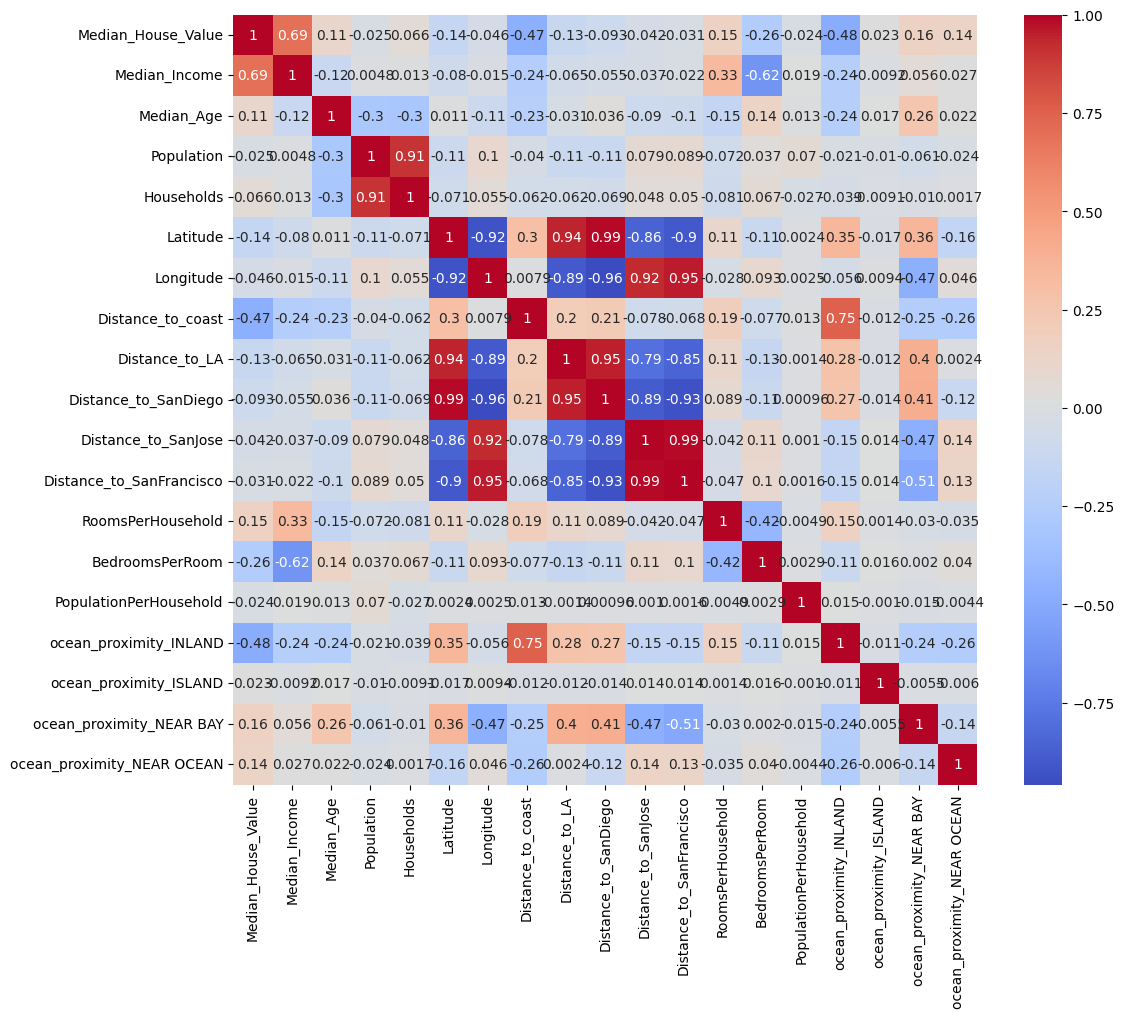

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

## Features Summary
1. Target--> Median_House_value

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Median_House_Value'])
y = df['Median_House_Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=50)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(16512, 18) (4128, 18) (16512,) (4128,)


## NOTE:
Original columns:       16
+ Engineered:            3
- Dropped:              -3
+ Encoded one-hot:      +4
-------------------------------
TOTAL COLUMNS:         = 20
* Minus 1 target column ('Median_House_Value')
* X has 18 columns

### Base_model (lr)
Train and Evaluate Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluate
print("🔹 Linear Regression Performance..Base-Model..")
print(f"R2 Score: {r2_score(y_test, y_pred_lr)}")
print(f"Mean Absolute Error(MAE): {mean_absolute_error(y_test, y_pred_lr)}")
print(f"Mean Squared Error(MSE): {mean_squared_error(y_test, y_pred_lr)}")
print(f"Root Mean Squared Error(RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_lr))}")

🔹 Linear Regression Performance..Base-Model..
R2 Score: 0.6646434076489427
Mean Absolute Error(MAE): 47909.256736942836
Mean Squared Error(MSE): 4429214470.72434
Root Mean Squared Error(RMSE): 66552.3438409523


## Random Forest for Base-Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
rf = RandomForestRegressor(n_estimators=100, random_state=50)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate

print("🌲 Random Forest Performance..Base-Model..")
print(f"R2 Score: {r2_score(y_test, y_pred_rf)}")
print(f"Mean Absolute Error(MAE): {mean_absolute_error(y_test, y_pred_rf)}")
print(f"Mean Squared Error(MSE): {mean_squared_error(y_test, y_pred_rf)}")
print(f"Root Mean Squared Error(RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_rf))}")

🌲 Random Forest Performance..Base-Model..
R2 Score: 0.8331300117265815
Mean Absolute Error(MAE): 30183.123989825577
Mean Squared Error(MSE): 2203931527.359152
Root Mean Squared Error(RMSE): 46946.049113414774


## Summary Linear Regression vs Random Forest
* R2-score: "lr=66%" vs "rf=83%" Huge jump
* MAE: "lr=$48K" vs "rf=$30K"
* MSE: rf is less tha half the lr

## XGBoost Base-model

In [ ]:
from xgboost import XGBRegressor
import numpy as np

xgb = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=5, random_state=50)
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test)

# Evaluate
print("⚡ XGBoost Performance..Base-Model..")
print(f"R² Score: {r2_score(y_test, y_pred_xgb)}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_xgb)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_xgb)}")
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb)) # using older colab version
print(f"Root Mean Squared Error (RMSE): {rmse_xgb}")

⚡ XGBoost Performance..Base-Model..
R² Score: 0.858404054664919
Mean Absolute Error (MAE): 27309.734016359314
Mean Squared Error (MSE): 1870125187.273827
Root Mean Squared Error (RMSE): 43244.94406602727


### Summary
SGBoost has the best result

## Plot Comparison Summary

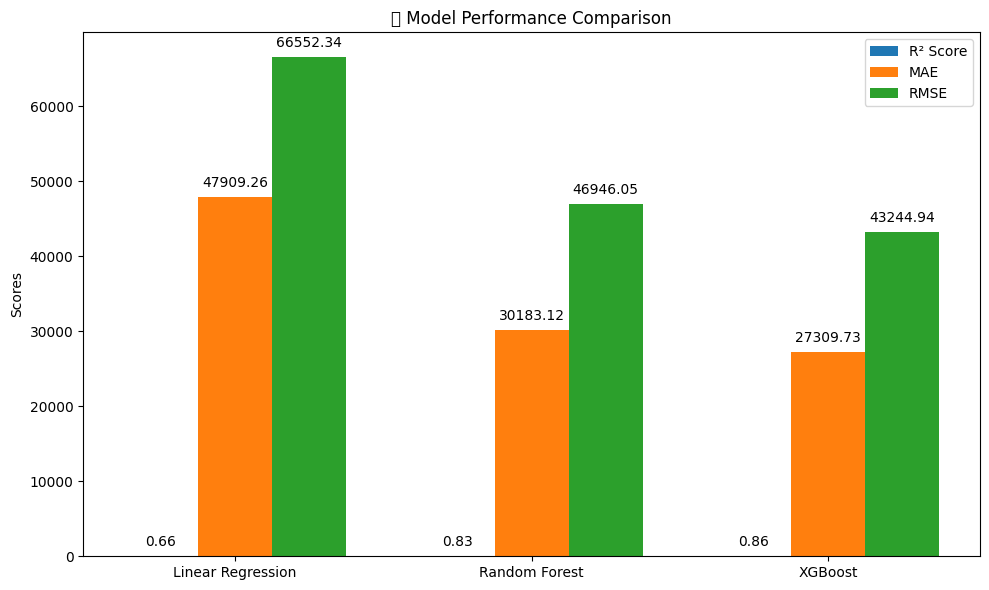

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Store the results
models = ['Linear Regression', 'Random Forest', 'XGBoost']
r2_scores = [r2_score(y_test, y_pred_lr),
             r2_score(y_test, y_pred_rf),
             r2_score(y_test, y_pred_xgb)]

mae_scores = [mean_absolute_error(y_test, y_pred_lr),
              mean_absolute_error(y_test, y_pred_rf),
              mean_absolute_error(y_test, y_pred_xgb)]

rmse_scores = [np.sqrt(mean_squared_error(y_test, y_pred_lr)),
               np.sqrt(mean_squared_error(y_test, y_pred_rf)),
               np.sqrt(mean_squared_error(y_test, y_pred_xgb))]

x = np.arange(len(models))
width = 0.25

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width, r2_scores, width, label='R² Score')
bar2 = ax.bar(x, mae_scores, width, label='MAE')
bar3 = ax.bar(x + width, rmse_scores, width, label='RMSE')

# Annotate values on top
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='center', va='bottom')

# Labels and titles
ax.set_ylabel('Scores')
ax.set_title('📊 Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
plt.tight_layout()
plt.show()

## What This Tells Us:
* XGBoost performs the best overall:

1. Highest R² (explains most variance in house prices)

2. Lowest MAE and RMSE (most accurate predictions on average)

* Random Forest is a strong second — more flexible than linear regression but slightly behind XGBoost.

* Linear Regression, while simplest, performs the worst.